In [ ]:
# 텐서플로에서는 tf.feature_column을 이용해 모델에 맞게 데이터를 변형하거나, 데이터 형식을 지정해 줄 수 있다.
# 이러한 tf.feature_column을 통해 처리한 데이터를 tf.estimator에 쉽게 적용하여 모델링 할 수 있다.
# feature_column을 이용해 데이터를 처리하는 방법과 Estimator가 아닌 텐서플로의 LowLevel API를 
# 이용해 feature_column의 결과가 어떠한 모양을 가지는지, 범주형 데이터에 대한 입력층 형태는 어떠한지
# 알아본다.
# 데이터는 크게 범주형(categorical, qualitative) 데이터와 수치형(numerical, quantitative) 데이터로 
# 나눈다.

In [ ]:
# 데이터의 형식을 머신러닝/딥러닝 모델에 맞게 데이터를 표현(data representation)하는 것이 중요하며,  적합한 데이터
# 표현을 찾는 것을 feature engineering이라고 한다.

In [ ]:
# pandas의 get_dummies()를 이용한 one-hot encoding
# pandas의 get_dummies() 함수를 이용해 간단히 원핫인코딩을 할 수 있다. get_dummies() 함수는 문자열 같은 object 나 category 타입의
# 데이터를 자동으로 원-핫-인코딩 해준다.

In [1]:
import pandas as pd

colors=['red', 'green', 'blue', 'red']

df = pd.DataFrame(colors, columns=['color'])
df_dummies = pd.get_dummies(df)
display(df)
display(df_dummies)

,color
0,red
1,green
2,blue
3,red


,color_blue,color_green,color_red
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1


In [ ]:
# scikit-learn의 onehotencoder를 이용한 one-hot-encoding
# scikit-learn의 OneHotEncoder를 사용하여 원-핫-인코딩을 해 줄 수 있다. 하지만 OneHotEncoder는 int 형식의 array를 입력으로 받기때문에,
# LabelEncoder를 이용해 문자열(str) 타입인 색깔을 int로 인덱싱해 준후에 OneHotEncoder로 원-핫-인코딩 해줘야 한다.
# LabelEncoder 객체 생성 후 fit()와 transform()을 호출하여 레이블 인코딩을 수행한다.

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# str -> int: indexing
encoder = LabelEncoder()
le = encoder.fit(colors)
print(le)
le_color = encoder.transform(colors)
print(le_color)
le_color = le_color.reshape(-1, 1) # 2차원 데이터로 변환..
print(le_color)

LabelEncoder()
[2 1 0 2]
[[2]
 [1]
 [0]
 [2]]


In [5]:
a = le_color.reshape(-1)
a

array([2, 1, 0, 2])

In [6]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder 객체 생성 후  fit( )과 transform( ) 적용
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(labels)

[0 1 4 5 3 3 2 2]


In [ ]:
# 지금은 데이터가 작아서 문자열 값이 어떤 숫자 값으로 인코딩 되었는지 직관적으로 알 수 있지만, 데이터가 많은 경우에는 이를 알지 못한다. 
# 이 경우에는 LabelEncoder 객체의 classes_ 속성값으로 확인 가능하다. 이 classes_ 속성은 0 번부터 순서대로 변환된 인코딩 값에 대한
# 원본 값을 가지고 있다. 즉 1이 냉장고 임을 알 수 있다. 이를 다시 디코딩하기 위해서는 inverse_transform()을 적용하면 된다.

In [7]:
print('classes:', encoder.classes_, '\n')
print('decoding:', encoder.inverse_transform(labels))

classes: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터'] 

decoding: ['TV' '냉장고' '전자렌지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


In [ ]:
# 레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환한다. 그러나 일괄적인 숫자값으로의 변환이 예측성능을 떨어뜨니는 원인이 될 수 있다.
# 이는 할당받은 카테고리 별 숫자값의 크고 작음에 대한 특성이 작용하기 때문이다. 냉장고 1이 믹서 2보다 작은 값을 가지므로 믹서가 냉장고보다 특정
# 알고리즘에서 가중치가 더 부여되거나, 더 중요하게 인식할 가능성이 발생한다. 
# 이러한 특성 때문에 레이블 인코딩은 선형회귀와 같은 ML 알고리즘에서 적용하지 않아야 한다. 트리 계열의 기계학습 알고리즘은
# 숮자의 이러한 특성을 반영하지 암ㅎ으므로 레이블 인토딩을 사용해도 된다.

In [8]:
# indexing -> one-hot
ohe =OneHotEncoder(sparse=False).fit(le_color)
ohe_color = ohe.transform(le_color)
print(ohe_color)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
# 원-핫-인코딩은 레이블 인코딩의 이러한 문제점 (인덱스의 대소관계)를 해결하기 위한 인코딩 방식
# 원-핫-인코딩은 피처값의 유형에 따라 새로운 피처를 추가하고 고유 값에 해당하는 컬럼에만 1을 표시, 나머지는 다 0을 표시하는 방식이다.
# 즉 행 형태로 되어 있는 피처의 고유값을 열 형태로 차원을 변환하 뒤, 고유 값에 해당하는 컬럼에만 1을 표시하고, 나머지 컬럼에는 0을 표시
# 원-핫 인코딩은 사이킷런에 OneHotEncoder 클래스로 쉽게 변환가능하다. 조금 주의할 점이 있는데, 첫번째는 OneHotEncoder로 변환하기 전에 
# 모든 문자열 값이 숫자형 값으로 변환돼야 하며, 두번째는 입력값으로 2차원 데이터가 필요하다는점이다. 즉 LabelEncoder를 거쳐서 바꾸는게 용이하다


In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 숫자값으로 변환하기 위해 LabelEncoder로 먼저 변환한다.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(labels)

# 2차원 데이터로 변환하기
labels = labels.reshape(-1, 1)
print(labels)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels=oh_encoder.transform(labels)
print(oh_labels.toarray())

[0 1 4 5 3 3 2 2]
[[0]
 [1]
 [4]
 [5]
 [3]
 [3]
 [2]
 [2]]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [ ]:
# pandas에는 원핫 인코딩을 더 쉽게 지원하는 API가 있다. get_dummies()이다. 사이킷런과 다르게 문자열 카테고리를
# 숫자형으로 변경할 필요없이 바로 적용가능하다.

In [10]:
import pandas as pd

items = pd.DataFrame(['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'],
                    columns=['item'])
print(items)

pd.get_dummies(items)

   item
0    TV
1   냉장고
2  전자렌지
3   컴퓨터
4   선풍기
5   선풍기
6    믹서
7    믹서


,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [ ]:
#1.2 구간분할(Binning), 버킷화(Bucketization), 이산화(Discretization)
# 선형 모델(linear model)은 선형 관계로만 모델링 하므로 특성(feature)이 하나일 때에는 직선으로 적합(fitting)된다. 이러한 선형모델을 더 좋게 강력하게 
# 모델링하기 위해서는 수치형 데이터인 하나의 특성을 일정한 구간으로 분할하여 여러개의 특성으로 만들어 주는 방법이 있다. 이러한 방법을 구간분할(binning), 
# 버킷화(bucketization) 또는 이산화(Discretization) 이라고 한다. 즉 수치형 데이터를 구간분할을 통해 범주형 데이터로 바꾸어 주는 것이다.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# create sample dataset
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4*x)+x)
    y = (y_no_noise+rnd.normal(size=(len(x))))/2
    
    return x.reshape(-1,1), y

X,y=make_wave(n_samples=100)
line = np.linspace(-3,3, 1000, endpoint=False).reshape(-1,1)

In [14]:
###############################
# 1. LinearRegression         #
###############################
reg = LinearRegression().fit(X, y)

In [13]:
#####################################
# 2. LinearRegression after binning #
#####################################
# binning
# np.linspace(start, stop, num): start: 배열의 시작값, stop:배열의 끝값, num:strat와 stop 사이를 몇개의 일정한 간격으로 요소를 만들 것인지 나타냄
# 예: x = np.linspace(0, 10, 11) --> x = [0. 1. 2. 3. 4. 5. 6. 7. 8. 9. 10.]
# 0 에서 10 까지 11개의 요소를 만들라는 것
bins = np.linspace(-3, 3, 11) 
print('bins : {}'.format(bins))
# -3에서 3까지 11개의 요소를 등간격으로 만들라는 것.. bin을 만들었음..

# 데이터가 어느 구간에 속하는지 labeling
# 연속형 변수를 범주형으로 변환하는 np.digitize(X, bins)
# 연속형 변수 X를 여러개 구간별 bins로 범주화
# bins=[a b] 이면.. 크게 X < a 인 0, a <= X < b 인 내부 범주 1~n개, X>=b 인 n+1 범주로 변환
which_bin = np.digitize(X, bins=bins)
print('\n Data points: \n', X[:5])
print('\n 데이터 포인트의 소속구간:\n', which_bin[:5])

encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
# One-hotencoding으로 변환
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

bins : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]

 Data points: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

 데이터 포인트의 소속구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
line_binned=encoder.transform(np.digitize(line, bins=bins))

reg_ohe=LinearRegression().fit(X_binned, y)

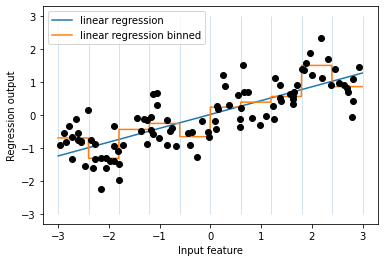

In [17]:
import matplotlib.pyplot as plt

plt.plot(line, reg.predict(line), label='linear regression')
plt.plot(line, reg_ohe.predict(line_binned), label='linear regression binned')
plt.plot(X[:, 0], y, 'o', c='k' )
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

In [ ]:
# 특성 교차 feature cross
# feature cross는 두개 이상의 features를 곱하여 새로운 feature를 만드는 방법
# feature cross는 비선형 문제를 해결할 수 있는 방법중 하나로 사용가능
# 선형으로 분리할 수 없었던 문제를 x_3 = x_1*x_2 feature cross를 추가함으로써, 

In [ ]:
# 범주형 데이터의 feature cross
# feature cross는 범주형 데이터에도 사용가능하다. 예를들어 california housing price 데이터 셋에서
# 위도(latitude)와 경도(longitude)를 각각 5개의 구간으로 분할(binning)한 뒤 feature cross를 적용한 것으로 격자(0,0) 부분을
# 원핫인코딩으로 나타내면 다음과 같이 나타낼 수 있다.
# [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0]  <- (5x5)격자의 (0,0) 타일을 원핫인코딩 표현
# latitude와 longitude를 각각 5개 구간으로 분할(binning) 한 뒤 feature cross를 이용해서 좌상단 타일을 원핫인코딩으로 나타내면
# 25차원 중에서 하나만 1이고, 나머지는 모두 0 인 Sparse representation이 된다. 
# 만약 범주형 데이터 차원이 커질 수록 feature cross의 원핫인코딩은 더욱 sparse 해진다. 이러한 문제를 해결하기 위해
# 원핫인코딩이 아닌 저차원으로 매핑해주는 임베딩(embedding)을 이용한다.

In [ ]:
# 2. TensorFlow Feature Column
# 텐서플로에서는 tf.feature_column을 이용해서 위에서 알아본 feature engineering을 적용한다.
# tf.feature_column은 크게 CategoricalColumn과 DenseColumn으로 구성되어 있으며, 이 둘을 동시에 상속받는 bucketized_column이 있다.

In [ ]:
# 2.1 categorical_column_with_vocabulary_list
# tf.feature_colum.categorical_column_with_vocabulary_list()는  str로 구성된 리스트를 범주형 데이터로 나타낸다. 
# categorical_column_with_vocabulary_list()를 사용하기 위해서는 나중에 살펴볼 indicator_column을 이용해 Multi-hot-encoding으로 wrapping하거나,
# embedding_column을 이용해서 저차원으로 임베딩을 wrapping 해주어야 한다.
# 아래 예제는 str 타입의 ['Python', 'Java', 'C++'] 리스트를 categorical_column_with_vocabulary_list()를 사용하여 범주형 데이터로 나타낸 뒤,
# indicator_column()을 이용해 멀티-핫-인코딩을 하는 코드이다.

In [19]:
import tensorflow as tf

# categorical variable
programming = tf.feature_column.categorical_column_with_vocabulary_list(
    key='programming',
    vocabulary_list=['Python', 'Java', 'C++'])

# multi-hot-encoding
programming_mh = tf.feature_column.indicator_column(programming)

feature_columns = [programming_mh]
features = {
    'programming':['Python', 'Java', 'C++'],
}

# input value
input_layer = tf.feature_column.input_layer(
    features = features,
    feature_columns=feature_columns)

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


In [20]:
# 결과값 확인
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    tf.tables_initializer().run()
    inputs = input_layer.eval()
    
print(inputs)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
# 2.2 indicator_column
# tf.feature_column.indicator_column()은 범주형 데이터를 멀티 핫(multi-hot) 인코딩으로 나타낸다. 아래 예제는 위의 예제를 이어서  ['Python', 'Python', 'C++']을 멀티 핫 인코딩한다.

In [21]:
feature_columns=[programming_mh]
features = {
    'programming':[['Python', 'Python', 'C++']],
}

#input value
input_layer = tf.feature_column.input_layer(
    features=features,
    feature_columns = feature_columns)

In [24]:
# 결과값 확인
with tf.Session() as sess :
    tf.global_variables_initializer().run()
    tf.tables_initializer().run()
    inputs = input_layer.eval()

In [25]:
print(inputs) # [[2, 0, 1]] Python:2, Java:0, C++:1

[[2. 0. 1.]]


In [ ]:
# 2.3 numeric_column
# tf.feature_column.numeric_column()은 수치형 데이터를 나타낸다.
# 이 예제에 나오는 데이터는 California Housing Price 데이터셋을 가지고 작성한 코드이다. 

In [26]:
# 데이터셋 확인

#cf_housing_df=pd.read_csv('https://storage.googleapis.com/mledu-datasets/california_housing_train.csv')

cf_housing_df = pd.read_csv('./data/california_housing_train.csv')
cf_housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [27]:
cf_housing_df['median_house_value']=cf_housing_df['median_house_value']/1000.0
cf_housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


In [29]:
# 아래 코드는 latitude와 longitude를 numeric_column()을 이용해 수치형 데이터로 나타낸 것이다.
longitude = tf.feature_column.numeric_column('longitude')
latitude =tf.feature_column.numeric_column('latitude')

In [30]:
feature_columns = [longitude, latitude]
features = {
    'longitude':[-114.31],
    'latitude':[34.19]
}

input_layer = tf.feature_column.input_layer(
    features=features,
    feature_columns=feature_columns)

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


In [31]:
with tf.Session() as sess:
    inputs = input_layer.eval()

In [32]:
print(inputs)

[[  34.19 -114.31]]


In [ ]:
# 2.4 bucketized_column
# tf.feature_column.bucketized_column()은 수치형 데이터를 구간분할(binning), 즉 버킷화(bucketization)하여 나타낸다. boundaries 인자에 구간을 설정해주면,
# 해당 구간에 맞춰 원-핫 인코딩을 해준다. 에를 들어, boundaries=[0., 1., 2.]와 같이 설정하면 (-inf, 0.), [0., 1.), [1., 2.) 그리고 [2, +inf)로 버킷화 한다.
# 아래 예제는 위에서 .numeric_column()을 이용해 수치형 데이터로 나타낸 다음 bucketized_column()을 이용해 버킷화 해준다.

In [33]:
import numpy as np

# boundary 설정 함수 (min, max)
def get_minmax_based_boundaries(feature_values, num_buckets):
    min_feature_values = feature_values.min()
    max_feature_values = feature_values.max()
    boundaries = np.linspace(min_feature_values, max_feature_values, num_buckets-1)
    
    return boundaries.tolist()

# 위도
latitude = tf.feature_column.numeric_column('latitude')

# Divide latitude into 5 buckets
bucketized_latitude =  tf.feature_column.bucketized_column(
    latitude,boundaries = get_minmax_based_boundaries(cf_housing_df['latitude'], 5))

feature_columns=[bucketized_latitude]
input_layer = tf.feature_column.input_layer(
    features={'latitude':[33]},
    feature_columns = feature_columns)

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


In [34]:
with tf.Session() as sess:
    inputs = input_layer.eval()

In [35]:
print(inputs)

[[0. 1. 0. 0. 0.]]


In [36]:
print(bucketized_latitude.boundaries)

(32.54, 35.67666666666667, 38.81333333333333, 41.95)


In [39]:
# 경도
longitude =  tf.feature_column.numeric_column('longitude')

# Divide longitude into 5 buckets
bucketized_longitude = tf.feature_column.bucketized_column(
    longitude, boundaries=get_minmax_based_boundaries(
        cf_housing_df['longitude'], 5))

feature_columns = [bucketized_longitude]
input_layer = tf.feature_column.input_layer(
    features={'longitude':[-123.3]},
    feature_columns =feature_columns)

In [40]:
with tf.Session() as sess:
    inputs = input_layer.eval()

In [41]:
print(inputs)

[[0. 1. 0. 0. 0.]]


In [42]:
print(bucketized_longitude.boundaries)

(-124.35, -121.00333333333333, -117.65666666666667, -114.31)


In [ ]:
# 2.5 crossed_column
# tf.feature_column.crossed_column()은 범주형 feature들에 대해 feature cross를 제공해 준다. 아래 예제는 위에서 살펴보았듯이 latitude와 longitude를 각각 5 개
# 구간으로 분할binning 한 뒤 feature cross를 적용한다.

In [43]:
# feature cross
long_x_lat=tf.feature_column.crossed_column(
    [bucketized_longitude, bucketized_latitude], 5*5)

# crossed feature -> one-hot(indicator column)
long_x_lat_ohe = tf.feature_column.indicator_column(long_x_lat)

feature_columns=[long_x_lat_ohe]

input_layer = tf.feature_column.input_layer(
    features = { 'longitude':[-123], 'latitude':[41]},
    feature_columns = feature_columns)

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


In [44]:
with tf.Session() as sess:
    inputs = input_layer.eval()

In [46]:
print(inputs)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


In [ ]:
# crossed_column()은 hash_bucket_size를 인자로 받는다 .이 hash_bucket_size에 따라 feature cross는 해시화(예:featur_cross%hash_bucket_size) 되어 원핫인코딩된다.
# 하지만 hash_bucket_size가 feature_cross 보다 작을 경우(위 예제에서는 25), 해시 충돌이 일어날 가능성이 높다.